In [1]:
!nvidia-smi

Fri Mar 15 11:34:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TSsLT4vkcdFSfD3vxsGT")
project = rf.workspace("masood").project("coconut-tree-k6rna")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [5]:
%cd {HOME}

/content


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.1.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/coconut-tree-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fal

/content


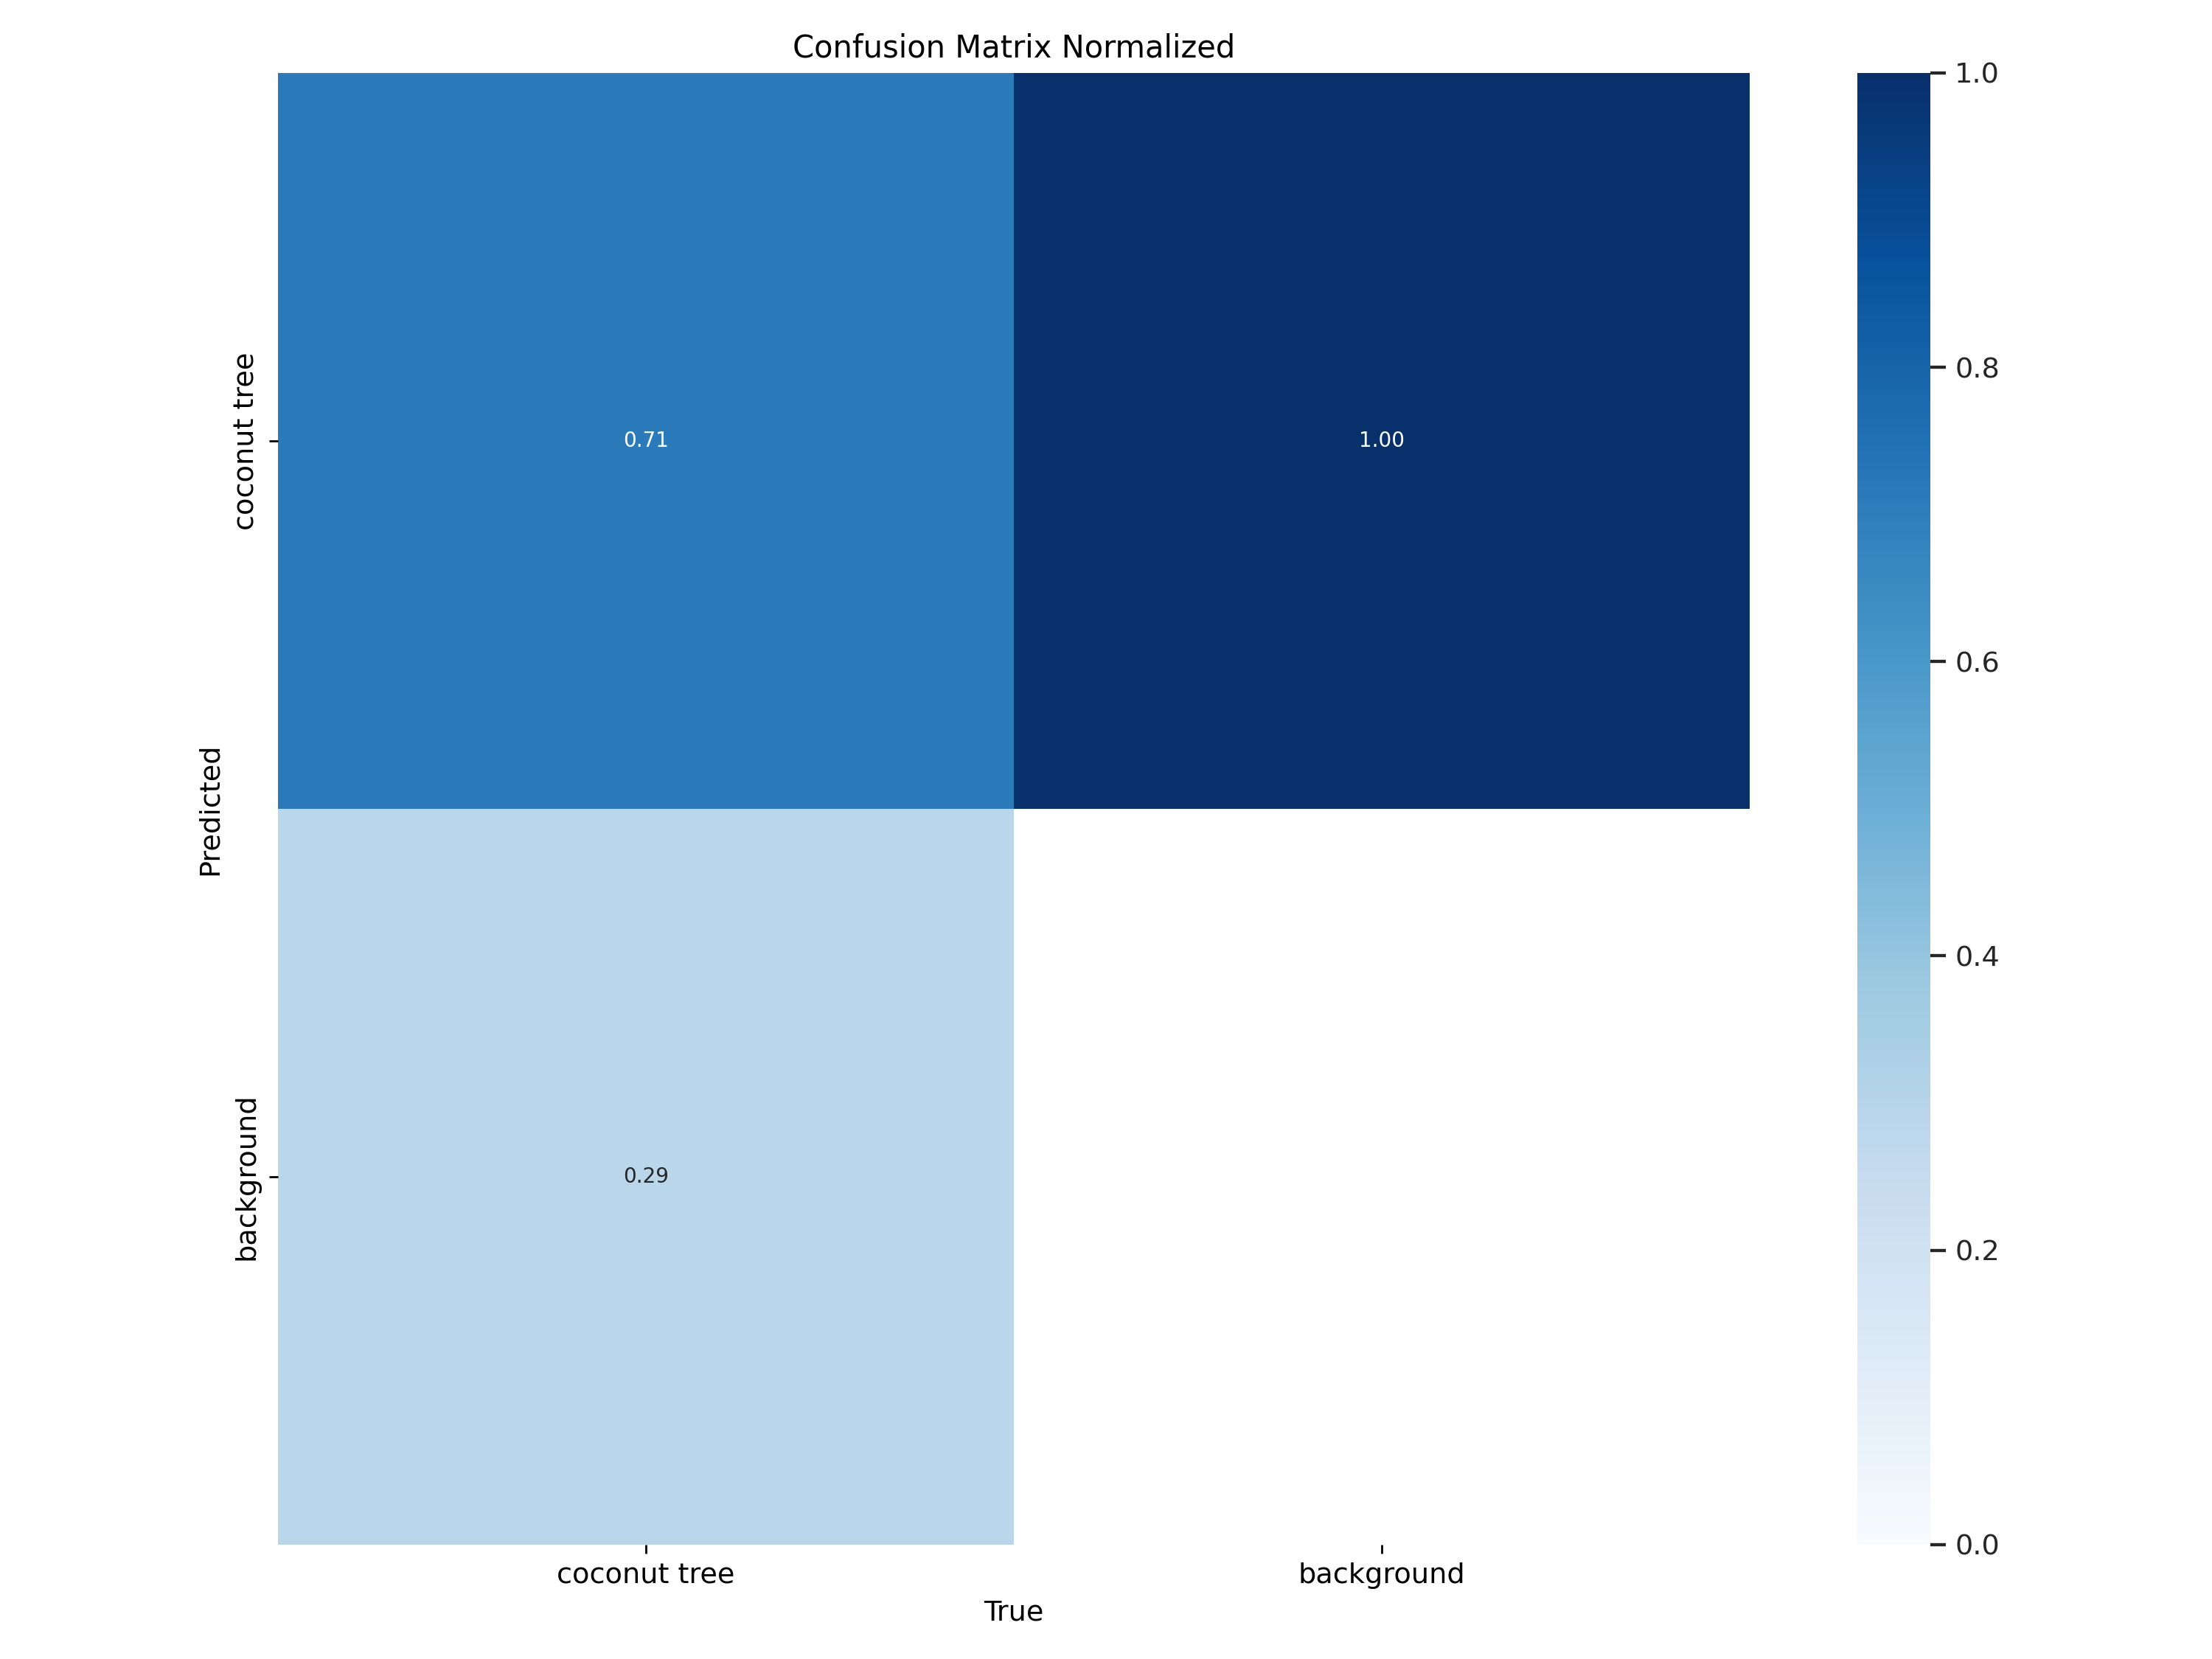

In [7]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix_normalized.png', width=800)

In [8]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/coconut-tree-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.08it/s]
                   all         23         42      0.804      0.643      0.767      0.448
Speed: 0.4ms preprocess, 33.1ms inference, 0.0ms loss, 23.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


/content


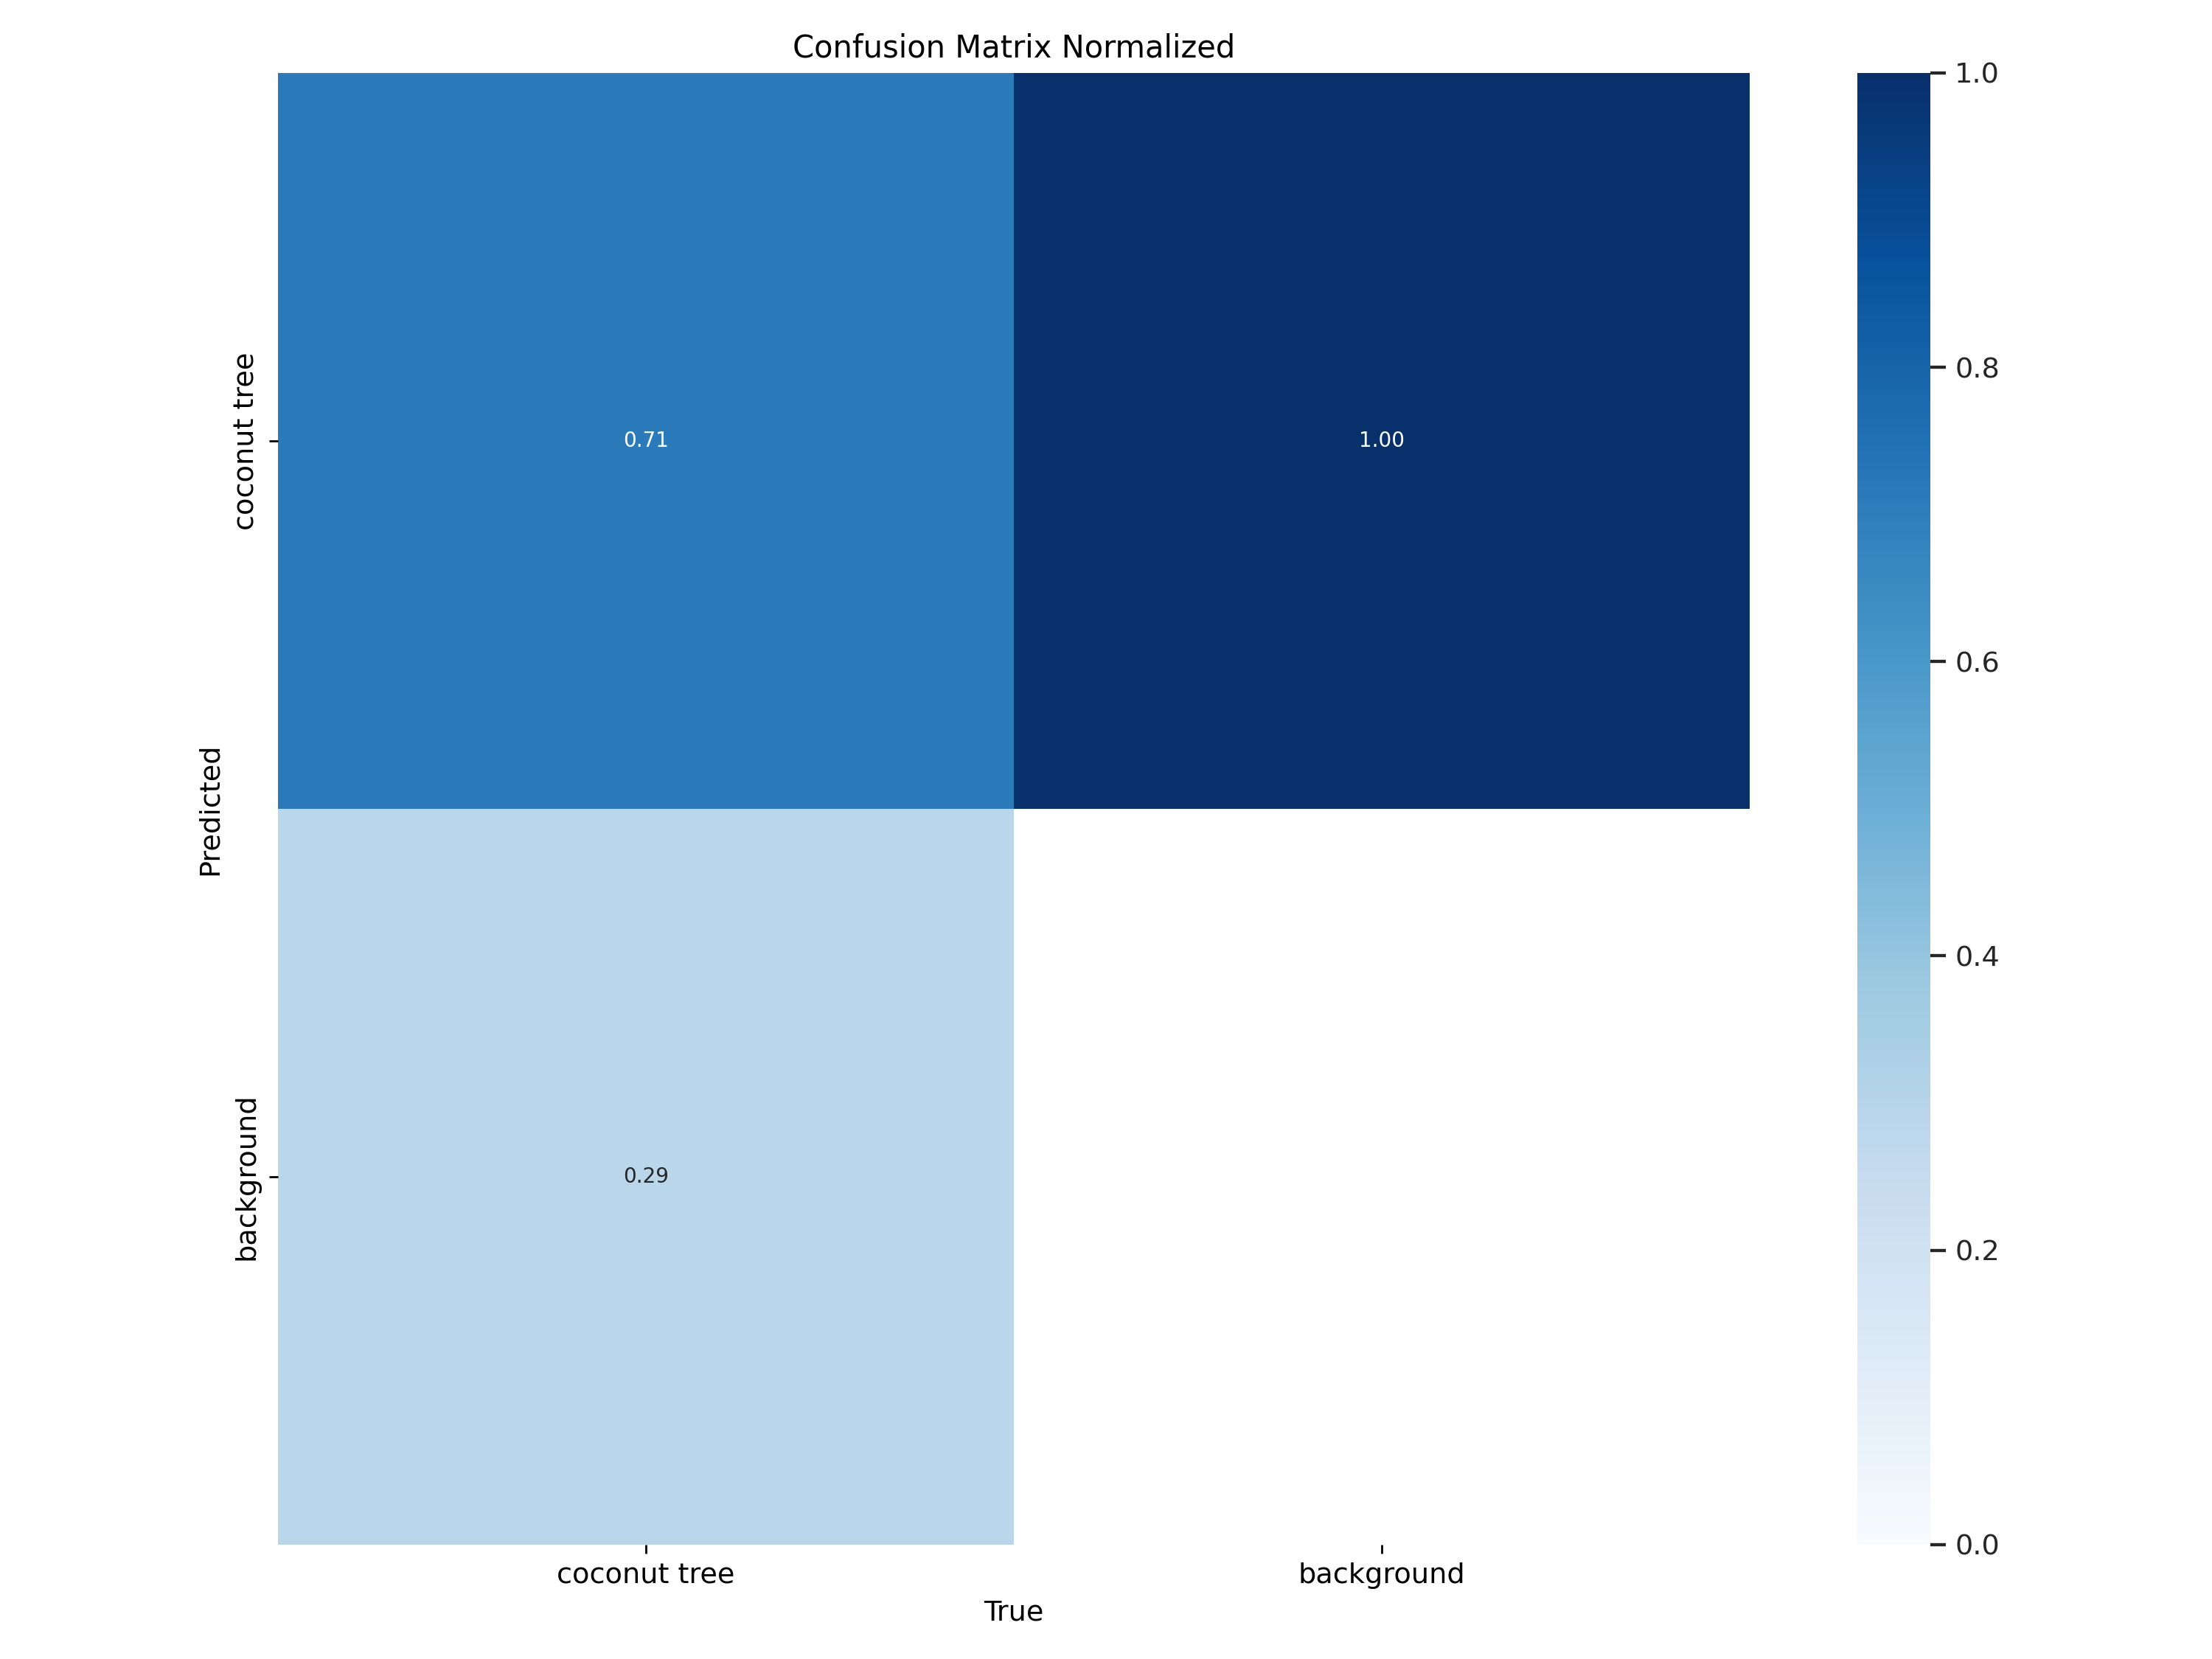

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png', width=800)

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/11 /content/coconut-tree-1/test/images/000002_jpg.rf.3f602f9afe223bc4b638b598b011b53e.jpg: 800x800 2 coconut trees, 28.5ms
image 2/11 /content/coconut-tree-1/test/images/000010_jpg.rf.8b1f8d13af845445a66adf4a6a5e1491.jpg: 800x800 2 coconut trees, 22.5ms
image 3/11 /content/coconut-tree-1/test/images/000029_jpg.rf.37d2ae9c99e64dab36f6b9d0cf765bc9.jpg: 800x800 3 coconut trees, 22.5ms
image 4/11 /content/coconut-tree-1/test/images/000038_jpg.rf.466cf3460c660b066047d500ea07cebb.jpg: 800x800 3 coconut trees, 22.5ms
image 5/11 /content/coconut-tree-1/test/images/000056_jpg.rf.eb58a064c4d85e5c05d8edfebc054f40.jpg: 800x800 4 coconut trees, 22.5ms
image 6/11 /content/coconut-tree-1/test/images/000057_jpg.rf.c8f828e68608f503e7f697fd1d35c3ab.jpg: 800x800 2 coconut trees, 22.5ms
image 7/11 /content/coconut-tree-1/

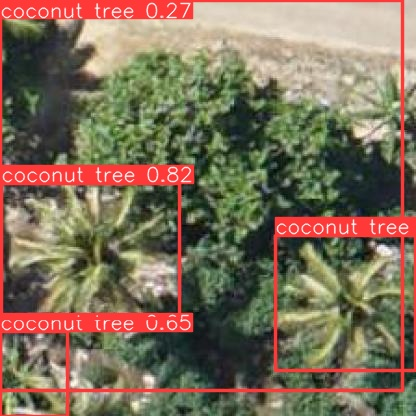

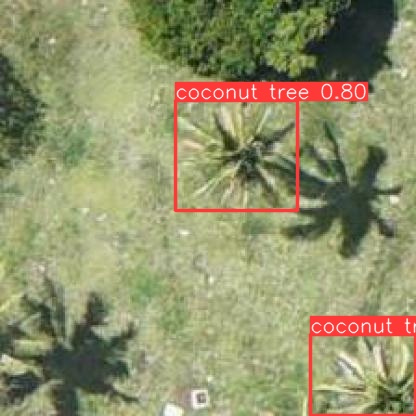

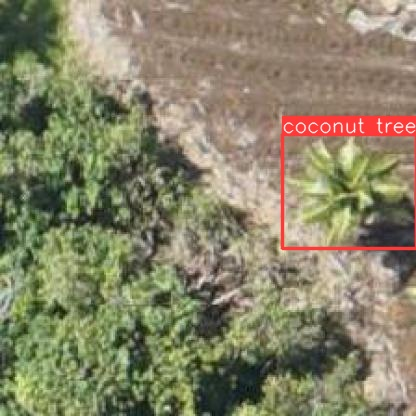

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")